In [34]:
# import dependencies
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [35]:
# import and read CleanTournamentTeamData.csv
TournamentTeamData_df = pd.read_csv('CleanTournamentTeamData.csv')
TournamentTeamData_df.head()

,YEAR,SEED,TEAM,ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,BARTTORVIK ADJUSTED OFFENSE,...,OP ASSIST %,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,Win
0,2022,1,Kansas,1,25.5,119.4,93.9,69.1,27.2,120.1,...,47.5,28.9,66.6,7.8,18.4,10.4,82.35,1.119,0.970,1
1,2022,1,Arizona,16,27.2,119.6,92.4,72.2,25.6,117.4,...,46.8,28.3,65.5,7.0,17.7,8.8,91.18,1.155,0.922,0
2,2022,1,Gonzaga,16,33.0,121.8,88.8,72.5,31.8,120.2,...,40.6,23.0,71.0,6.6,17.0,6.7,89.66,1.190,0.885,0
3,2022,1,Baylor,32,26.3,117.9,91.6,67.2,26.3,116.6,...,55.5,28.4,63.7,7.3,22.9,8.9,81.25,1.112,0.925,0
4,2022,2,Duke,4,23.7,119.4,95.7,67.4,25.8,119.9,...,51.8,28.5,68.1,8.1,16.1,7.2,82.35,1.169,0.979,0


In [36]:
# determine the unique values in each column
unique_counts = TournamentTeamData_df.nunique() 
unique_counts

YEAR                               14
SEED                               16
TEAM                              241
ROUND                               8
KENPOM ADJUSTED EFFICIENCY        334
KENPOM ADJUSTED OFFENSE           255
KENPOM ADJUSTED DEFENSE           231
KENPOM ADJUSTED TEMPO             151
BARTTORVIK ADJUSTED EFFICIENCY    346
BARTTORVIK ADJUSTED OFFENSE       268
BARTTORVIK ADJUSTED DEFENSE       223
BARTHAG                           401
ELITE SOS                         814
BARTTORVIK ADJUSTED TEMPO         152
2PT %                             149
3PT %                             130
FREE THROW %                      168
EFG %                             136
FREE THROW RATE                   239
3PT RATE                          229
ASSIST %                          227
OFFENSIVE REBOUND %               195
DEFENSIVE REBOUND %               154
BLOCK %                           140
TURNOVER %                        108
2PT % DEFENSE                     139
3PT % DEFENS

In [37]:
# Drop Team Column
TournamentTeamData_df = TournamentTeamData_df.drop("TEAM", axis = 1)
TournamentTeamData_df.head()

,YEAR,SEED,ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,BARTTORVIK ADJUSTED OFFENSE,BARTTORVIK ADJUSTED DEFENSE,...,OP ASSIST %,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,Win
0,2022,1,1,25.5,119.4,93.9,69.1,27.2,120.1,92.9,...,47.5,28.9,66.6,7.8,18.4,10.4,82.35,1.119,0.970,1
1,2022,1,16,27.2,119.6,92.4,72.2,25.6,117.4,91.8,...,46.8,28.3,65.5,7.0,17.7,8.8,91.18,1.155,0.922,0
2,2022,1,16,33.0,121.8,88.8,72.5,31.8,120.2,88.4,...,40.6,23.0,71.0,6.6,17.0,6.7,89.66,1.190,0.885,0
3,2022,1,32,26.3,117.9,91.6,67.2,26.3,116.6,90.3,...,55.5,28.4,63.7,7.3,22.9,8.9,81.25,1.112,0.925,0
4,2022,2,4,23.7,119.4,95.7,67.4,25.8,119.9,94.1,...,51.8,28.5,68.1,8.1,16.1,7.2,82.35,1.169,0.979,0


<AxesSubplot:ylabel='Density'>

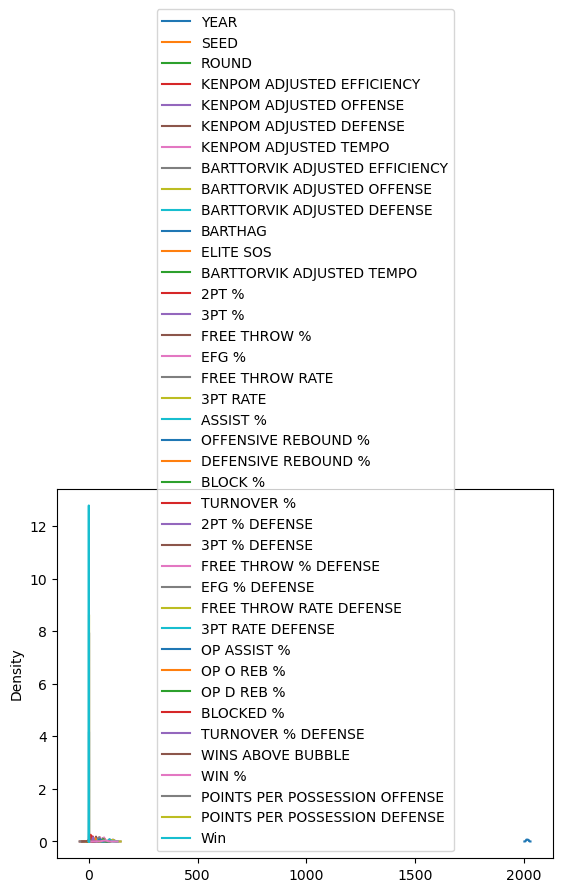

In [38]:
# Visualize the value counts of Elite SOS
TournamentTeamData_df.plot.density()

In [39]:
# Generate our categorical variable lists
categorical_variables = TournamentTeamData_df.dtypes[TournamentTeamData_df.dtypes == "object"].index.tolist()

In [41]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(TournamentTeamData_df[categorical_variables]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(categorical_variables)
encode_df.head()

""
0
1
2
3
4


In [ ]:
# Split our preprocessed data into our features and target arrays
y = TournamentTeamData_df["Win"].values.reshape(-1, 1)
X = TournamentTeamData_df.drop(columns=['Win']).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")